In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import seaborn as sn
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [4]:
from src import soporte as sp

**Hipótesis:**
Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa

In [5]:
df_testing = pd.read_csv('../data/df_final.csv', index_col=0)
pd.set_option('display.max_columns', None)

df_testing.head()


,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51,No,Unknown,2015.722222,6,3,Unknown,1,1,M,3,5,research director,3,Unknown,16280.83,42330.17,7,no,13,3.0,3,Full Time,0,Unknown,5,3.0,20,15,15,195370.00,Y
52,No,Unknown,2063.388889,1,4,life sciences,2,3,M,2,5,manager,3,Unknown,16665.83,43331.17,0,Unknown,14,3.0,1,Unknown,1,34.0,5,3.0,33,11,9,199990.00,Y
42,No,travel_rarely,1984.253968,4,2,technical degree,3,3,M,3,5,manager,4,married,16026.67,41669.33,1,no,11,3.0,4,Unknown,0,22.0,3,Unknown,22,11,15,192320.00,Y
47,No,travel_rarely,1771.404762,2,4,medical,4,1,F,3,4,research director,3,married,14307.50,37199.50,3,Unknown,19,3.0,2,Full Time,2,Unknown,2,Unknown,20,5,6,171690.00,N
46,No,Unknown,1582.771346,3,3,technical degree,5,1,F,4,4,sales executive,1,divorced,12783.92,33238.20,2,no,12,3.0,4,Unknown,1,Unknown,5,3.0,19,2,8,153407.04,N


In [6]:
df_testing["job_satisfaction"].unique()

array([3, 4, 1, 2], dtype=int64)

In [7]:
df_testing["relationship_satisfaction"].unique()

array([3, 1, 4, 2], dtype=int64)

In [8]:
df_testing["environment_satisfaction"].unique()

array([ 1,  3,  4,  2, 42, 37, 35, 25, 27, 31, 39, 21, 15, 14, 33, 19, 12,
       13, 28, 47, 36, 29, 24, 46, 16, 22, 41, 49, 11, 48, 18, 10, 45, 38,
       17, 20, 26, 43], dtype=int64)

In [9]:
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1678 entries, 51 to 32
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   attrition                   1678 non-null   object 
 1   business_travel             1678 non-null   object 
 2   daily_rate                  1678 non-null   float64
 3   distance_from_home          1678 non-null   int64  
 4   education                   1678 non-null   int64  
 5   education_field             1678 non-null   object 
 6   employee_number             1678 non-null   int64  
 7   environment_satisfaction    1678 non-null   int64  
 8   gender                      1678 non-null   object 
 9   job_involvement             1678 non-null   int64  
 10  job_level                   1678 non-null   int64  
 11  job_role                    1678 non-null   object 
 12  job_satisfaction            1678 non-null   int64  
 13  marital_status              1678 non-nu

In [10]:
df_testing.columns

Index(['attrition', 'business_travel', 'daily_rate', 'distance_from_home',
       'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'job_involvement', 'job_level',
       'job_role', 'job_satisfaction', 'marital_status', 'monthly_income',
       'monthly_rate', 'num_companies_worked', 'overtime',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'standard_hours', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_since_last_promotion',
       'years_with_curr_manager', 'salary', 'remote_work'],
      dtype='object')

Creamos nueva columna para sacar el promedio de los índices de satisfacción de los empleados

In [11]:
df_testing["employee_satisfaction"]=df_testing[["environment_satisfaction", "job_satisfaction", "relationship_satisfaction"]].mean(axis=1).round(2)

In [12]:
df_testing.head()

,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work,employee_satisfaction
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51,No,Unknown,2015.722222,6,3,Unknown,1,1,M,3,5,research director,3,Unknown,16280.83,42330.17,7,no,13,3.0,3,Full Time,0,Unknown,5,3.0,20,15,15,195370.00,Y,2.33
52,No,Unknown,2063.388889,1,4,life sciences,2,3,M,2,5,manager,3,Unknown,16665.83,43331.17,0,Unknown,14,3.0,1,Unknown,1,34.0,5,3.0,33,11,9,199990.00,Y,2.33
42,No,travel_rarely,1984.253968,4,2,technical degree,3,3,M,3,5,manager,4,married,16026.67,41669.33,1,no,11,3.0,4,Unknown,0,22.0,3,Unknown,22,11,15,192320.00,Y,3.67
47,No,travel_rarely,1771.404762,2,4,medical,4,1,F,3,4,research director,3,married,14307.50,37199.50,3,Unknown,19,3.0,2,Full Time,2,Unknown,2,Unknown,20,5,6,171690.00,N,2.00
46,No,Unknown,1582.771346,3,3,technical degree,5,1,F,4,4,sales executive,1,divorced,12783.92,33238.20,2,no,12,3.0,4,Unknown,1,Unknown,5,3.0,19,2,8,153407.04,N,2.00


**Creamos grupos de satisfacción en dos columnas A y B**



    Grupo A (Control): Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 4.

    Grupo B (Variante): Empleados con un nivel de satisfacción en el trabajo inferior a 3 en la misma escala.




In [13]:
df_testing["groups"] = np.where(df_testing['employee_satisfaction'] >= 3, 'A', 'B')
df_testing.head(2)

,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work,employee_satisfaction,groups
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51,No,Unknown,2015.722222,6,3,Unknown,1,1,M,3,5,research director,3,Unknown,16280.83,42330.17,7,no,13,3.0,3,Full Time,0,Unknown,5,3.0,20,15,15,195370.0,Y,2.33,B
52,No,Unknown,2063.388889,1,4,life sciences,2,3,M,2,5,manager,3,Unknown,16665.83,43331.17,0,Unknown,14,3.0,1,Unknown,1,34.0,5,3.0,33,11,9,199990.0,Y,2.33,B


In [14]:
def exploratory_data(dataframe, columna_groups): 

    print(f"La columna {columna_groups} tiene las siguientes valores únicos:")
    display(pd.DataFrame(dataframe[columna_groups].value_counts()))    
    

    for categoria in dataframe[columna_groups].unique():
        
        dataframe_filtrado = dataframe[dataframe[columna_groups] == categoria]
    
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas categóricas para el grupo {categoria.upper()} son: ")
        display(dataframe_filtrado.describe(include = "O").T)
        
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas numéricas para el grupo {categoria.upper()} son: ")
        display(dataframe_filtrado.describe().T)

In [15]:
exploratory_data(df_testing, "groups")

La columna groups tiene las siguientes valores únicos:


,count
groups,
B,874
A,804



 ..................... 

Los principales estadísticos de las columnas categóricas para el grupo B son: 


,count,unique,top,freq
attrition,874,2,No,706
business_travel,874,4,Unknown,400
education_field,874,7,Unknown,398
gender,874,2,M,509
job_role,874,9,sales executive,200
marital_status,874,4,Unknown,371
overtime,874,3,no,390
standard_hours,874,3,Part Time,481
total_working_years,874,39,Unknown,280
work_life_balance,874,5,3.0,496



 ..................... 

Los principales estadísticos de las columnas numéricas para el grupo B son: 


,count,mean,std,min,25%,50%,75%,max
daily_rate,874.0,667.509580,467.032592,108.539683,290.03551,556.256661,1001.025794,2063.388889
distance_from_home,874.0,10.062929,9.446876,1.000000,2.00000,7.000000,15.000000,49.000000
education,874.0,2.983982,1.010696,1.000000,2.00000,3.000000,4.000000,5.000000
employee_number,874.0,809.543478,468.232401,1.000000,412.25000,793.000000,1217.500000,1611.000000
environment_satisfaction,874.0,2.247140,1.056599,1.000000,1.00000,2.000000,3.000000,4.000000
job_involvement,874.0,2.751716,0.710841,1.000000,2.00000,3.000000,3.000000,4.000000
job_level,874.0,2.061785,1.091813,1.000000,1.00000,2.000000,3.000000,5.000000
job_satisfaction,874.0,2.258581,1.072173,1.000000,1.00000,2.000000,3.000000,4.000000
monthly_income,874.0,5391.422148,3772.186992,876.667000,2342.59000,4492.840000,8085.207500,16665.830000
monthly_rate,874.0,14017.701922,9807.683894,2279.330000,6090.75000,11681.390000,21021.542500,43331.170000



 ..................... 

Los principales estadísticos de las columnas categóricas para el grupo A son: 


,count,unique,top,freq
attrition,804,2,No,700
business_travel,804,4,Unknown,401
education_field,804,7,Unknown,376
gender,804,2,M,500
job_role,804,9,sales executive,181
marital_status,804,4,Unknown,304
overtime,804,3,Unknown,339
standard_hours,804,3,Part Time,446
total_working_years,804,40,Unknown,269
work_life_balance,804,5,3.0,450



 ..................... 

Los principales estadísticos de las columnas numéricas para el grupo A son: 


,count,mean,std,min,25%,50%,75%,max
daily_rate,804.0,668.699487,475.125407,104.103175,290.03551,556.256661,950.573413,2.047706e+03
distance_from_home,804.0,12.404229,11.377460,1.000000,3.00000,9.000000,19.000000,4.900000e+01
education,804.0,2.876866,1.036573,1.000000,2.00000,3.000000,4.000000,5.000000e+00
employee_number,804.0,810.203980,466.125375,3.000000,399.50000,833.500000,1212.000000,1.614000e+03
environment_satisfaction,804.0,6.456468,9.452080,1.000000,3.00000,4.000000,4.000000,4.900000e+01
job_involvement,804.0,2.728856,0.710086,1.000000,2.00000,3.000000,3.000000,4.000000e+00
job_level,804.0,2.067164,1.108314,1.000000,1.00000,2.000000,3.000000,5.000000e+00
job_satisfaction,804.0,3.269900,0.876163,1.000000,3.00000,4.000000,4.000000,4.000000e+00
monthly_income,804.0,5515.753652,4927.612222,840.833000,2342.59000,4492.840000,7726.040000,9.316700e+04
monthly_rate,804.0,14042.689776,9977.633030,2186.170000,6090.75000,11681.390000,19962.042500,4.300183e+04


Después del análisis exploratorio, usaremos la columna "Attrition" para obtener la métrica principal. Siendo:

    -  "NO" indica que el empleado no ha dejado la empresa (sin rotación).
    - "YES" indica que el empleado ha dejado la empresa (con rotación).

In [16]:
df_attrition = df_testing[["groups", "attrition", "job_satisfaction", "relationship_satisfaction", "environment_satisfaction"]]
df_attrition.head()

,groups,attrition,job_satisfaction,relationship_satisfaction,environment_satisfaction
age,,,,,
51,B,No,3,3,1
52,B,No,3,1,3
42,A,No,4,4,3
47,B,No,3,2,1
46,B,No,1,4,1


In [17]:
df_attrition.describe().T

,count,mean,std,min,25%,50%,75%,max
job_satisfaction,1678.0,2.743147,1.105172,1.0,2.0,3.0,4.0,4.0
relationship_satisfaction,1678.0,2.700238,1.079494,1.0,2.0,3.0,4.0,4.0
environment_satisfaction,1678.0,4.264005,6.912695,1.0,2.0,3.0,4.0,49.0


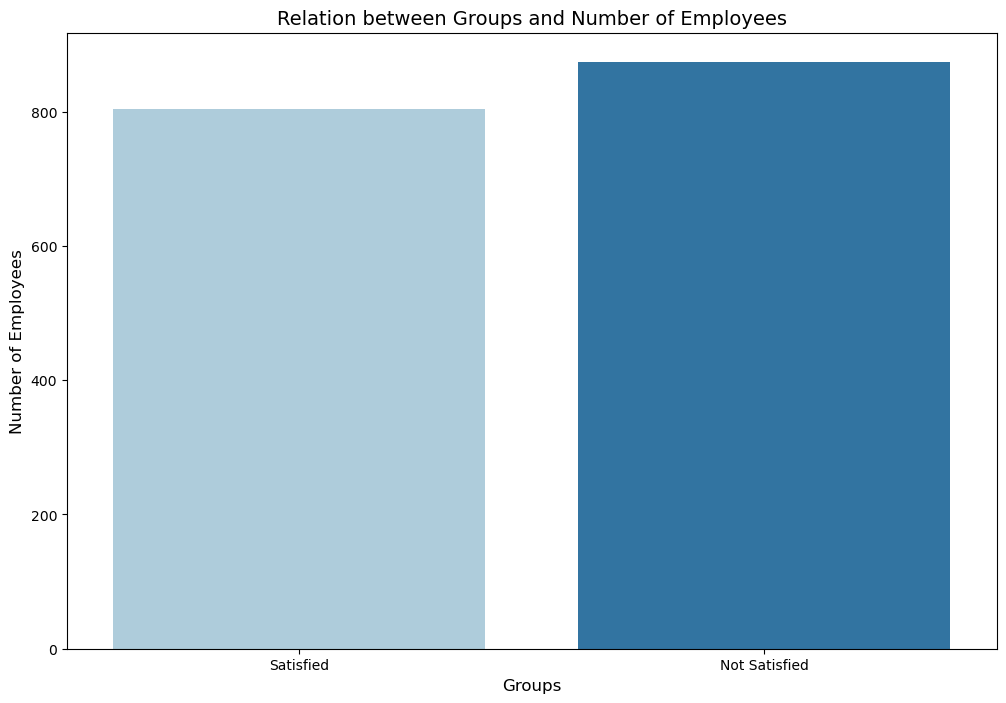

In [47]:
# Actualizar las etiquetas de los grupos
group_counts = df_attrition['groups'].value_counts()

# Reordenar los grupos de modo que 'A' quede primero y 'B' después
group_counts = group_counts[['A', 'B']]

# Reemplazar las etiquetas
group_labels = ['Satisfied', 'Not Satisfied']

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=group_labels, y=group_counts.values, palette="Paired")

# Añadir título
plt.title("Relation between Groups and Number of Employees", fontsize=14)

# Etiquetas
plt.xlabel('Groups', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)

# Mostrar el gráfico
plt.show()


La gráfica muestra: 
La empresa tiene más empleados no satisfechos (Grupo B) que satisfechos (Grupo A).
Esto puede ser un indicador de problemas organizacionales relacionados con el entorno laboral, las condiciones de trabajo, o la satisfacción general de los empleados.



Agrupamos y posteriormente calculamos la tasa de rotación

In [19]:

df_grupoA = df_attrition[df_attrition["groups"]== "A"] 

df_grupoB = df_attrition[df_attrition["groups"]== "B"]

In [20]:
df_grupoA.groupby("attrition")["groups"].count().reset_index()

,attrition,groups
0,No,700
1,Yes,104


In [21]:
df_grupoB.groupby("attrition")["groups"].count().reset_index()

,attrition,groups
0,No,706
1,Yes,168


In [22]:
tasa_rotacionA=np.round(df_grupoA[df_grupoA["attrition"]== "Yes"].shape[0]/df_grupoA.shape[0],2)

print(tasa_rotacionA)

0.13


In [23]:
tasa_rotacionB=np.round(df_grupoB[df_grupoB["attrition"]== "Yes"].shape[0]/df_grupoB.shape[0],2)

print(tasa_rotacionB)

0.19


In [24]:
dicc_grupos_rotacion={"groups":["A", "B"], "turnover_rate":[tasa_rotacionA,tasa_rotacionB]}

In [25]:
df_grupos_rotacion=pd.DataFrame(dicc_grupos_rotacion)

df_grupos_rotacion

,groups,turnover_rate
0,A,0.13
1,B,0.19


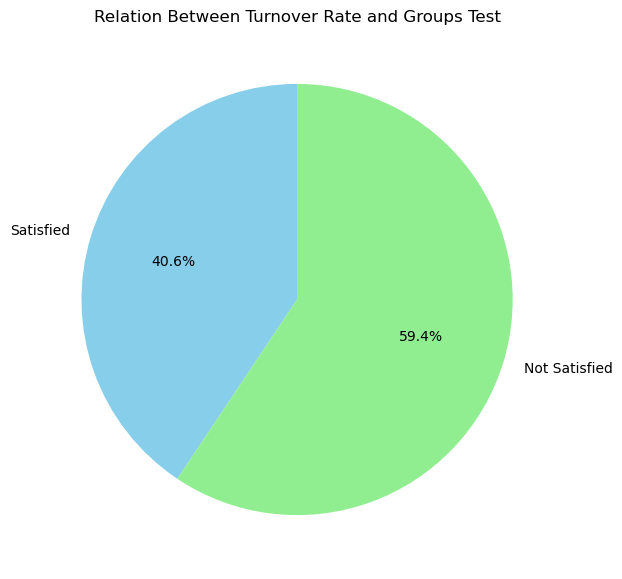

In [45]:
# Actualizar las etiquetas de los grupos
df_grupos_rotacion['groups'] = df_grupos_rotacion['groups'].replace({'A': 'Satisfied', 'B': 'Not Satisfied'})

labels = df_grupos_rotacion['groups']
sizes = df_grupos_rotacion['turnover_rate']

# Crear el gráfico de pastel
plt.figure(figsize=(7, 7))  # Tamaño de la figura
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])

# Agregar un título
plt.title('Relation Between Turnover Rate and Groups Test')


# Mostrar el gráfico
plt.show()


Observamos en este gráfico que el Grupo B contribuye más a la tasa de rotación (59.4%). Esto indica que hay algo en las condiciones del Grupo B que podría estar impulsando una mayor rotación, como:
- Menor satisfacción laboral.
- Diferencias en las condiciones laborales.
- Oportunidades externas más atractivas.

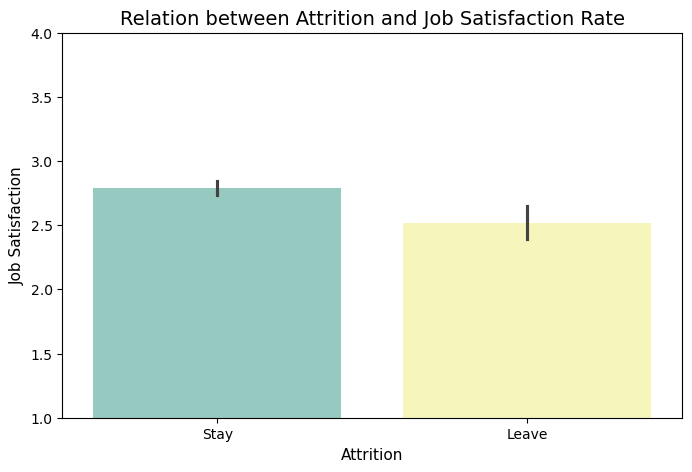

In [27]:
plt.figure(figsize=(8, 5)) 

# Reemplazar las etiquetas del eje x con 'Stay' y 'Leave'
sns.barplot(x="attrition", 
            y="job_satisfaction", 
            data=df_attrition, 
            palette="Set3");

# Cambiar las etiquetas del eje x manualmente
plt.xticks([0, 1], ['Stay', 'Leave'])

# Ajustar manualmente el rango del eje Y
plt.ylim(1, 4)  # Establecer el rango de valores del eje Y entre 1 y 4

plt.xlabel("Attrition", fontsize=11)
plt.ylabel("Job Satisfaction", fontsize=11) 
plt.title("Relation between Attrition and Job Satisfaction Rate", fontsize=14)

plt.show()

Podemos interpretar la gráfica de la siguiente manera: Si los empleados están satisfechos, tienen más probabilidades de quedarse; si están insatisfechos, es más probable que se vayan.

Esas líneas negras encima de las barras muestran un rango llamado error estándar. Este rango nos ayuda a entender cuánto puede variar el promedio (en este caso, la satisfacción laboral) si tomamos diferentes muestras de los empleados.
En este caso, las líneas negras son cortas, lo que significa que los datos no varían mucho y son bastante precisos. Si las líneas negras no se tocan, podemos asumir que la diferencia entre "Yes" y "No" en satisfacción laboral es real y no por azar.

In [28]:
df_attrition.groupby("attrition")["job_satisfaction"].mean().reset_index()

,attrition,job_satisfaction
0,No,2.786629
1,Yes,2.518382


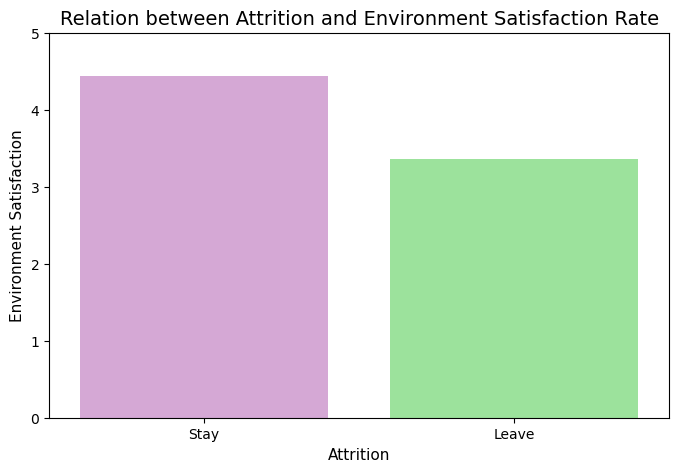

In [43]:
# Crear el gráfico con colores personalizados y sin barras de error
plt.figure(figsize=(8, 5))

sns.barplot(x="attrition", 
            y="environment_satisfaction", 
            data=df_attrition, 
            palette=["plum", "lightgreen"], 
            ci=None)  # Eliminar las barras de error

# Cambiar las etiquetas del eje x
plt.xticks([0, 1], ['Stay', 'Leave'])

# Ajustar manualmente el rango del eje Y
plt.ylim(0, 5)  # Establecer el rango de valores del eje Y entre 0 y 5

plt.xlabel("Attrition", fontsize=11)
plt.ylabel("Environment Satisfaction", fontsize=11)
plt.title("Relation between Attrition and Environment Satisfaction Rate", fontsize=14)

plt.show()


 Observamos que los empleados que se fueron tienen una satisfacción baja con su entorno de trabajo y los que se quedan tienen una satisfacción más alta, podemos concluir que un ambiente de trabajo agradable y cómodo puede ser un factor clave para que los empleados decidan quedarse en la empresa. 

A continuación, definiremos si es un problema de proporciones o de media

In [30]:
df_attrition.groupby("attrition")["environment_satisfaction"].mean().reset_index()

,attrition,environment_satisfaction
0,No,4.438122
1,Yes,3.363971


Todas estas pruebas demuestran que nos encontramos con un problema de proporciones, por lo que, como attrition y groups son ambas variables categóricas, utilizamos la prueba de Chi-cuadrado para analizar la correlación entre ellas.

### Pruebas estadísticas ###

Hipótesis:

- Hipótesis nula (H0): No existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. 

- Hipótesis alternativa (H1): Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. 



In [31]:
#Creamos una tabla de contingencia

tabla_contingencia = pd.crosstab(df_testing ["groups"], df_testing["attrition"])

tabla_contingencia

attrition,No,Yes
groups,,
A,700,104
B,706,168


In [32]:
_, p_value, _, _ = chi2_contingency(tabla_contingencia)
print(p_value)

0.000615989067701292


Si p_value < 0.05: Existe una diferencia significativa

Si p_value > 0.05: No existe una diferencia significativa

In [33]:
p_value<0.05

True

Con este resultado podemos decir que NO rechazamos la hipótesis alternativa (H1): 

Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. 

Como valor agregado, vamos a realizar una comparativa de los empleados que se van y los que se quedan en función del salario.

In [34]:
pd.crosstab(df_testing ["groups"], df_testing["salary"])

salary,10090.00,10520.00,10910.00,11290.00,12000.00,12740.00,13930.00,14199.96,15630.00,15690.00,16110.00,17020.00,18780.00,19510.00,20010.00,20080.00,20130.00,20140.00,20220.00,20240.00,20290.00,20330.00,20420.00,20420.04,20450.00,20620.00,20640.00,20660.00,20700.00,20739.96,20800.00,20830.00,20860.00,20900.00,20960.00,21050.00,21070.00,21189.96,21210.00,21270.00,21410.00,21440.00,21440.04,21480.00,21660.00,21740.00,21760.00,21770.00,21870.00,22070.00,22100.00,22160.00,22179.96,22180.00,22260.00,22440.00,22580.00,22580.04,22590.00,22690.00,22740.00,22850.00,22900.00,22970.04,23020.00,23050.00,23080.00,23140.00,23180.04,23220.00,23280.00,23290.00,23400.00,23480.00,23620.00,23660.00,23700.00,23720.00,23760.00,23770.00,23790.00,23799.96,23800.00,23890.00,23940.00,24000.00,24040.00,24130.00,24300.00,24370.00,24390.00,24500.00,24550.00,24610.00,24680.00,24759.96,24790.00,24960.00,25010.00,25140.00,25170.00,25190.00,25320.00,25389.96,25390.00,25430.00,25430.04,25460.00,25520.04,25530.00,25590.00,25610.00,25640.00,25659.96,25700.00,25710.00,25719.96,25800.00,25869.96,25870.00,25930.00,25960.00,26000.00,26100.00,26220.00,26420.00,26540.00,26550.00,26570.00,26570.04,26589.96,26600.00,26619.96,26780.00,26830.00,26840.00,26900.04,26910.00,26940.00,26960.00,26960.04,27000.00,27050.00,27180.00,27230.00,27250.00,27410.00,27410.04,27430.00,27600.00,27660.00,27680.00,27740.00,27820.00,27890.00,27910.00,27930.00,27990.00,28040.00,28090.00,28100.00,28110.00,28111.08,28111.13,28209.96,28210.00,28270.00,28350.00,28380.00,28510.00,28530.00,28560.00,28580.04,28620.00,28630.00,28970.00,28990.00,29040.00,29090.00,29110.00,29259.96,29290.00,29330.00,29360.00,29560.00,29600.00,29720.00,29730.00,29740.00,29960.00,30220.00,30340.00,30380.04,30550.00,30580.00,30690.00,30720.00,31020.00,31170.00,31310.04,31430.00,31490.00,31610.00,31620.00,31800.00,31960.00,32100.00,32109.96,32120.00,32290.00,32300.00,33060.00,33120.00,33480.00,33750.00,33760.00,33770.00,33880.00,34070.00,34080.00,34190.00,34200.00,34240.00,34329.96,34410.00,34450.00,34470.00,34479.96,34520.00,34770.00,34910.00,35390.00,35390.04,35640.00,35780.00,35790.00,35799.96,35910.00,35970.00,36170.00,36220.00,36290.00,36600.00,36810.00,36920.00,37020.00,37080.00,37550.00,37600.00,37800.00,38150.00,38670.00,38860.00,38940.00,39020.00,39040.00,39070.00,39170.00,39200.00,39290.00,39360.00,39440.00,39780.00,39830.00,39890.00,39999.96,40010.00,40140.00,40510.00,40660.00,40689.96,40710.00,40810.00,40869.96,41070.00,41150.00,41270.00,41619.96,41630.04,41870.00,41940.00,41970.00,42000.00,42130.00,42210.00,42270.00,42300.00,42330.00,42399.96,42440.00,42440.04,42490.00,42560.00,42580.00,42620.00,42840.00,42850.00,42940.00,43059.96,43060.00,43170.00,43190.00,43230.00,43350.00,43420.00,43730.00,43740.00,43770.00,43810.00,43820.00,43850.04,44000.00,44030.00,44040.00,44220.00,44240.00,44250.00,44400.00,44440.00,44470.00,44480.00,45020.00,45050.00,45340.00,45370.00,45380.00,45560.00,45580.00,45680.00,45770.00,46150.00,46270.00,46390.00,46480.00,46490.00,46680.00,46820.04,47210.00,47229.96,47280.00,47350.00,47390.04,47660.00,47680.00,47740.00,47770.00,47870.00,48050.00,48410.00,48500.00,48510.00,48549.96,48590.00,48690.00,48760.00,48770.00,48830.00,48980.00,49300.00,49410.00,49599.96,49600.00,49630.00,49680.00,49690.00,50060.04,50100.00,50210.00,50550.00,50670.00,50700.00,50710.00,50940.00,50980.00,51210.00,51260.00,51470.00,51510.00,51540.00,51550.00,51710.00,52040.00,52060.00,52200.00,52280.00,52380.00,52569.96,52570.00,52580.00,52650.00,52940.00,53040.00,53090.00,53210.04,53240.00,53260.00,53370.00,53630.00,53680.00,53730.00,53914.08,53914.11,53960.00,53960.04,53990.00,54050.00,54060.00,54100.00,54410.04,54540.00,54670.00,54680.00,54720.00,54730.00,54849.96,54860.04,54870.00,54880.00,55050.00,55070.00,55610.00,55620.00,55770.00,56050.00,56469.96,56610.00,56660.00,56740.00,56750.00,56750.04,56769.96,57310.00,57470.00,57690.00,58130.00,58130.04,58280.00,58280.04,58779.96,59020.00,59140.00,59330.00,59400.00,59740.

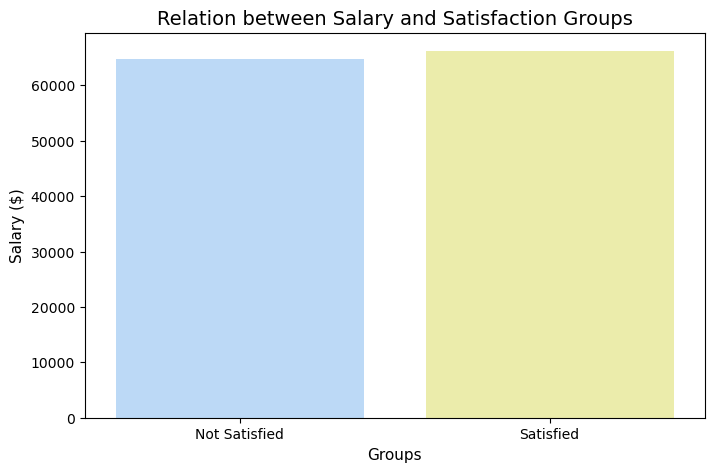

In [48]:
plt.figure(figsize=(8, 5))

# Actualizar las etiquetas en el DataFrame
df_testing['groups'] = df_testing['groups'].replace({'A': 'Satisfied', 'B': 'Not Satisfied'})

# Crear el gráfico de barras
sns.barplot(x="groups", 
            y="salary", 
            data=df_testing, 
            hue="groups", 
            palette=["#B3D9FF", "#F5F7A0"],
            ci=None)  

plt.xlabel("Groups", fontsize=11)
plt.ylabel("Salary ($)", fontsize=11)
plt.title("Relation between Salary and Satisfaction Groups", fontsize=14)

# Mostrar el gráfico
plt.show()


En esta gráfica podemos observar que el salario no influye en que los empleados dejen la empresa ya que ambos grupos tienen salarios muy similares.

In [36]:
# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.
    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.
    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """
    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [37]:
normalidad(df_testing, "salary")

Para la columna salary los datos no siguen una distribución normal.


In [38]:
# como los datos no son normales realizamos una prueba no paramétrica: Mann_whitney

grupo_control = df_testing[df_testing["groups"]== "A"]["salary"]
grupo_test = df_testing[df_testing["groups"]== "B"]["salary"]

In [39]:
mannwhitneyu(grupo_control, grupo_test)

MannwhitneyuResult(statistic=351709.0, pvalue=0.9708740395425016)

In [40]:
_, p_value = mannwhitneyu(grupo_control, grupo_test)
print(p_value)

0.9708740395425016


In [41]:
p_value>0.05

True

Si p_value < 0.05: Existe una diferencia significativa

Si p_value > 0.05: No existe una diferencia significativa

Podemos reafirmar lo analizado en la gráfica anterior, no existe una diferencia significativa entre los salarios de ambos grupos, por lo que el salario no influye en la satisfación de los empleados.